<a href="https://colab.research.google.com/github/despygurl/AV-Loan_def_pred/blob/master/Loan_Def_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependency

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
!pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import dabl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc

# Data Collection

In [59]:
# Load Data
df_train = pd.read_csv('/content/drive/MyDrive/3_BELAJAR/ONLINE COURSE/AnalyticsVidhya/Data Hackathon/AnalyticsVidhya - Loan Default Prediction/train_LZV4RXX.csv')
df_test = pd.read_csv('/content/drive/MyDrive/3_BELAJAR/ONLINE COURSE/AnalyticsVidhya/Data Hackathon/AnalyticsVidhya - Loan Default Prediction/test_4zJg83n.csv')

## Checking Data

In [60]:
# Data train
df_train.head(3)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1


In [61]:
# Data test
df_test.head(3)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0


# Data Exploration

In [62]:
print("Shape of training data: ",df_train.shape)
print("Shape of testing data: ",df_test.shape)

Shape of training data:  (7000, 10)
Shape of testing data:  (3000, 9)


In [63]:
# Load data train info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


In [64]:
# Load data test info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           3000 non-null   int64  
 1   age               3000 non-null   int64  
 2   education         2908 non-null   float64
 3   proof_submitted   3000 non-null   object 
 4   loan_amount       3000 non-null   int64  
 5   asset_cost        3000 non-null   int64  
 6   no_of_loans       3000 non-null   int64  
 7   no_of_curr_loans  3000 non-null   int64  
 8   last_delinq_none  3000 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 211.1+ KB


In [65]:
# Checking missing values on data train
df_train.isna().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [66]:
# Checking missing values on data test
df_test.isna().sum()

loan_id              0
age                  0
education           92
proof_submitted      0
loan_amount          0
asset_cost           0
no_of_loans          0
no_of_curr_loans     0
last_delinq_none     0
dtype: int64

Points taken from the data so far:
- 7000 training data & 3000 test data
- 10 variables in dataset
- 9 features & 1 target
- 8 numericals & 1 categorical data type
- 245 missing values in training data & 92 missing values in testing data
- both missing values are from 'education' feature

In [67]:
# Data imputation for there are missing values in both train and test data ('education')
df_train['education'] = df_train['education'].fillna(df_train['education'].mode().iloc[0])
df_test['education'] = df_test['education'].fillna(df_test['education'].mode().iloc[0])

In [68]:
# Converting values in 'education' into category type
df_train['education'] = df_train['education'].astype('category')
df_test['education'] = df_test['education'].astype('category')

In [69]:
# Checking descriptive statistics of training data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,7000.0,3500.500000,2020.870275,1.0,1750.75,3500.5,5250.25,7000.0
age,7000.0,36.096571,7.587700,21.0,29.00,36.0,43.00,50.0
loan_amount,7000.0,663355.172571,149812.773669,167880.0,577788.00,657108.0,737364.00,1781376.0
asset_cost,7000.0,916299.750857,214492.244573,473352.0,797901.00,858426.0,957675.00,2419200.0
no_of_loans,7000.0,2.853286,5.471932,0.0,0.00,0.0,3.00,109.0
no_of_curr_loans,7000.0,1.371143,2.189278,0.0,0.00,0.0,2.00,33.0
last_delinq_none,7000.0,0.013286,0.114504,0.0,0.00,0.0,0.00,1.0
loan_default,7000.0,0.400000,0.489933,0.0,0.00,0.0,1.00,1.0


In [70]:
# Encode non-numericals data into numericals
le = LabelEncoder()

df_train['proof_submitted'] = le.fit_transform(df_train['proof_submitted'])
df_test['proof_submitted'] = le.fit_transform(df_test['proof_submitted'])

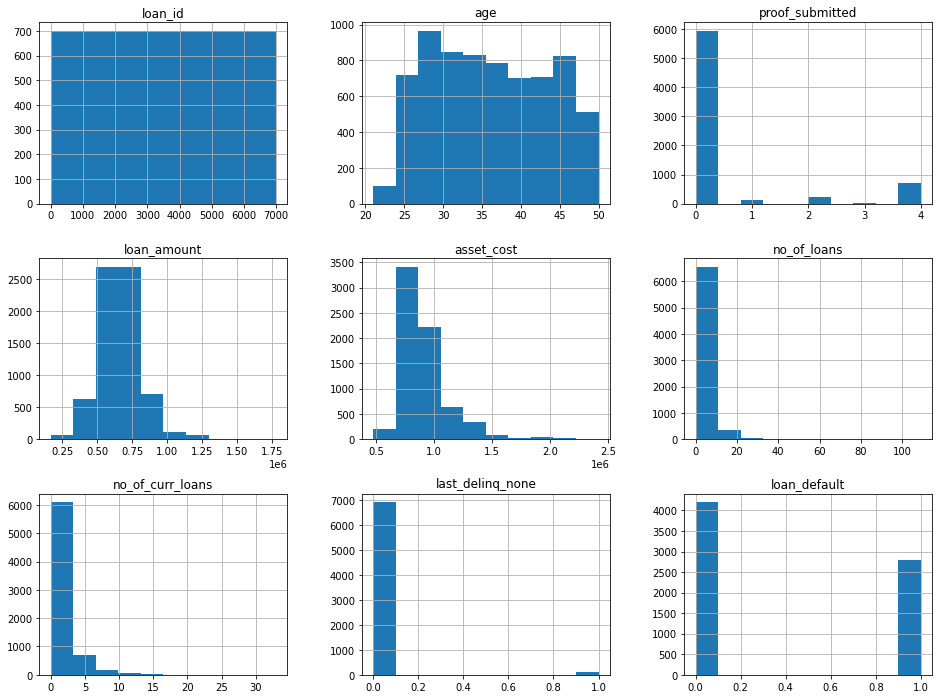

In [71]:
df_train.hist(bins=10, figsize=(16,12))
plt.show()

In [82]:
correlation = df_train.corr()
correlation

,loan_id,age,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
loan_id,1.000000,-0.017165,0.013407,-0.020757,-0.032053,-0.023589,-0.015454,-0.002829,0.011921
age,-0.017165,1.000000,-0.016329,-0.058011,-0.122741,0.193026,0.184503,0.050325,-0.029571
proof_submitted,0.013407,-0.016329,1.000000,0.021219,0.081710,-0.054839,-0.059093,-0.015934,0.054418
loan_amount,-0.020757,-0.058011,0.021219,1.000000,0.735176,0.010867,0.014788,-0.009412,0.115736
asset_cost,-0.032053,-0.122741,0.081710,0.735176,1.000000,-0.052643,-0.054021,-0.023489,0.048020
no_of_loans,-0.023589,0.193026,-0.054839,0.010867,-0.052643,1.000000,0.774705,0.235024,-0.045738
no_of_curr_loans,-0.015454,0.184503,-0.059093,0.014788,-0.054021,0.774705,1.000000,0.272716,-0.057306
last_delinq_none,-0.002829,0.050325,-0.015934,-0.009412,-0.023489,0.235024,0.272716,1.000000,0.014772
loan_default,0.011921,-0.029571,0.054418,0.115736,0.048020,-0.045738,-0.057306,0.014772,1.000000


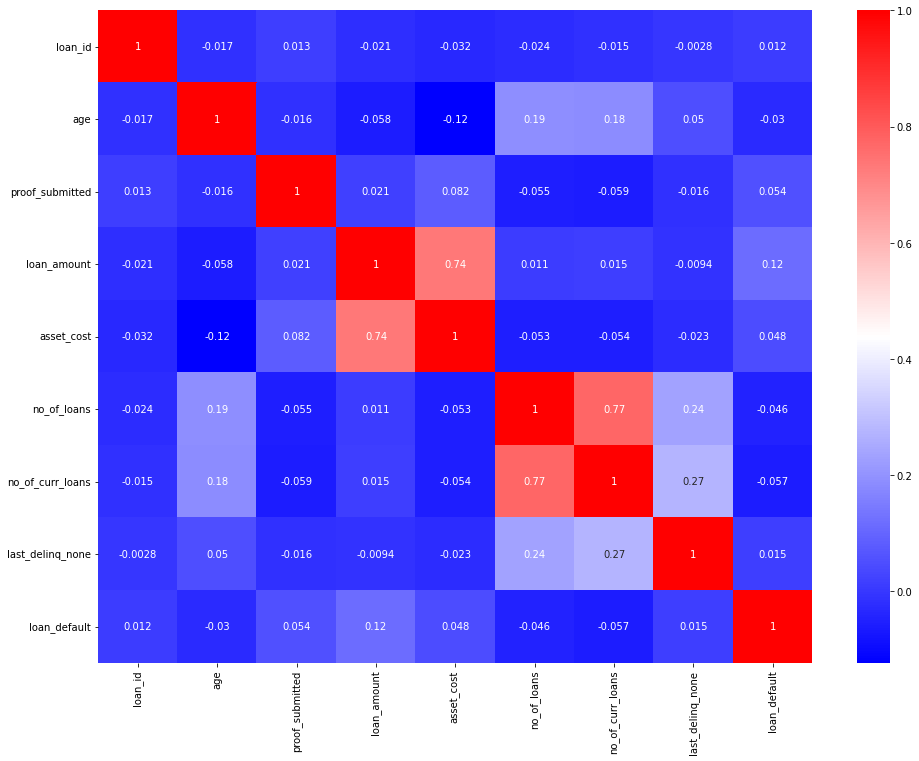

In [85]:
# Correlation Hotmap Plot
plt.figure(figsize=(16,12))
sns.heatmap(df_train.corr(), cmap='bwr', annot=True)

In [84]:
# Correlation each feature to target data
correlation['loan_default'].sort_values(ascending=False)

loan_default        1.000000
loan_amount         0.115736
proof_submitted     0.054418
asset_cost          0.048020
last_delinq_none    0.014772
loan_id             0.011921
age                -0.029571
no_of_loans        -0.045738
no_of_curr_loans   -0.057306
Name: loan_default, dtype: float64

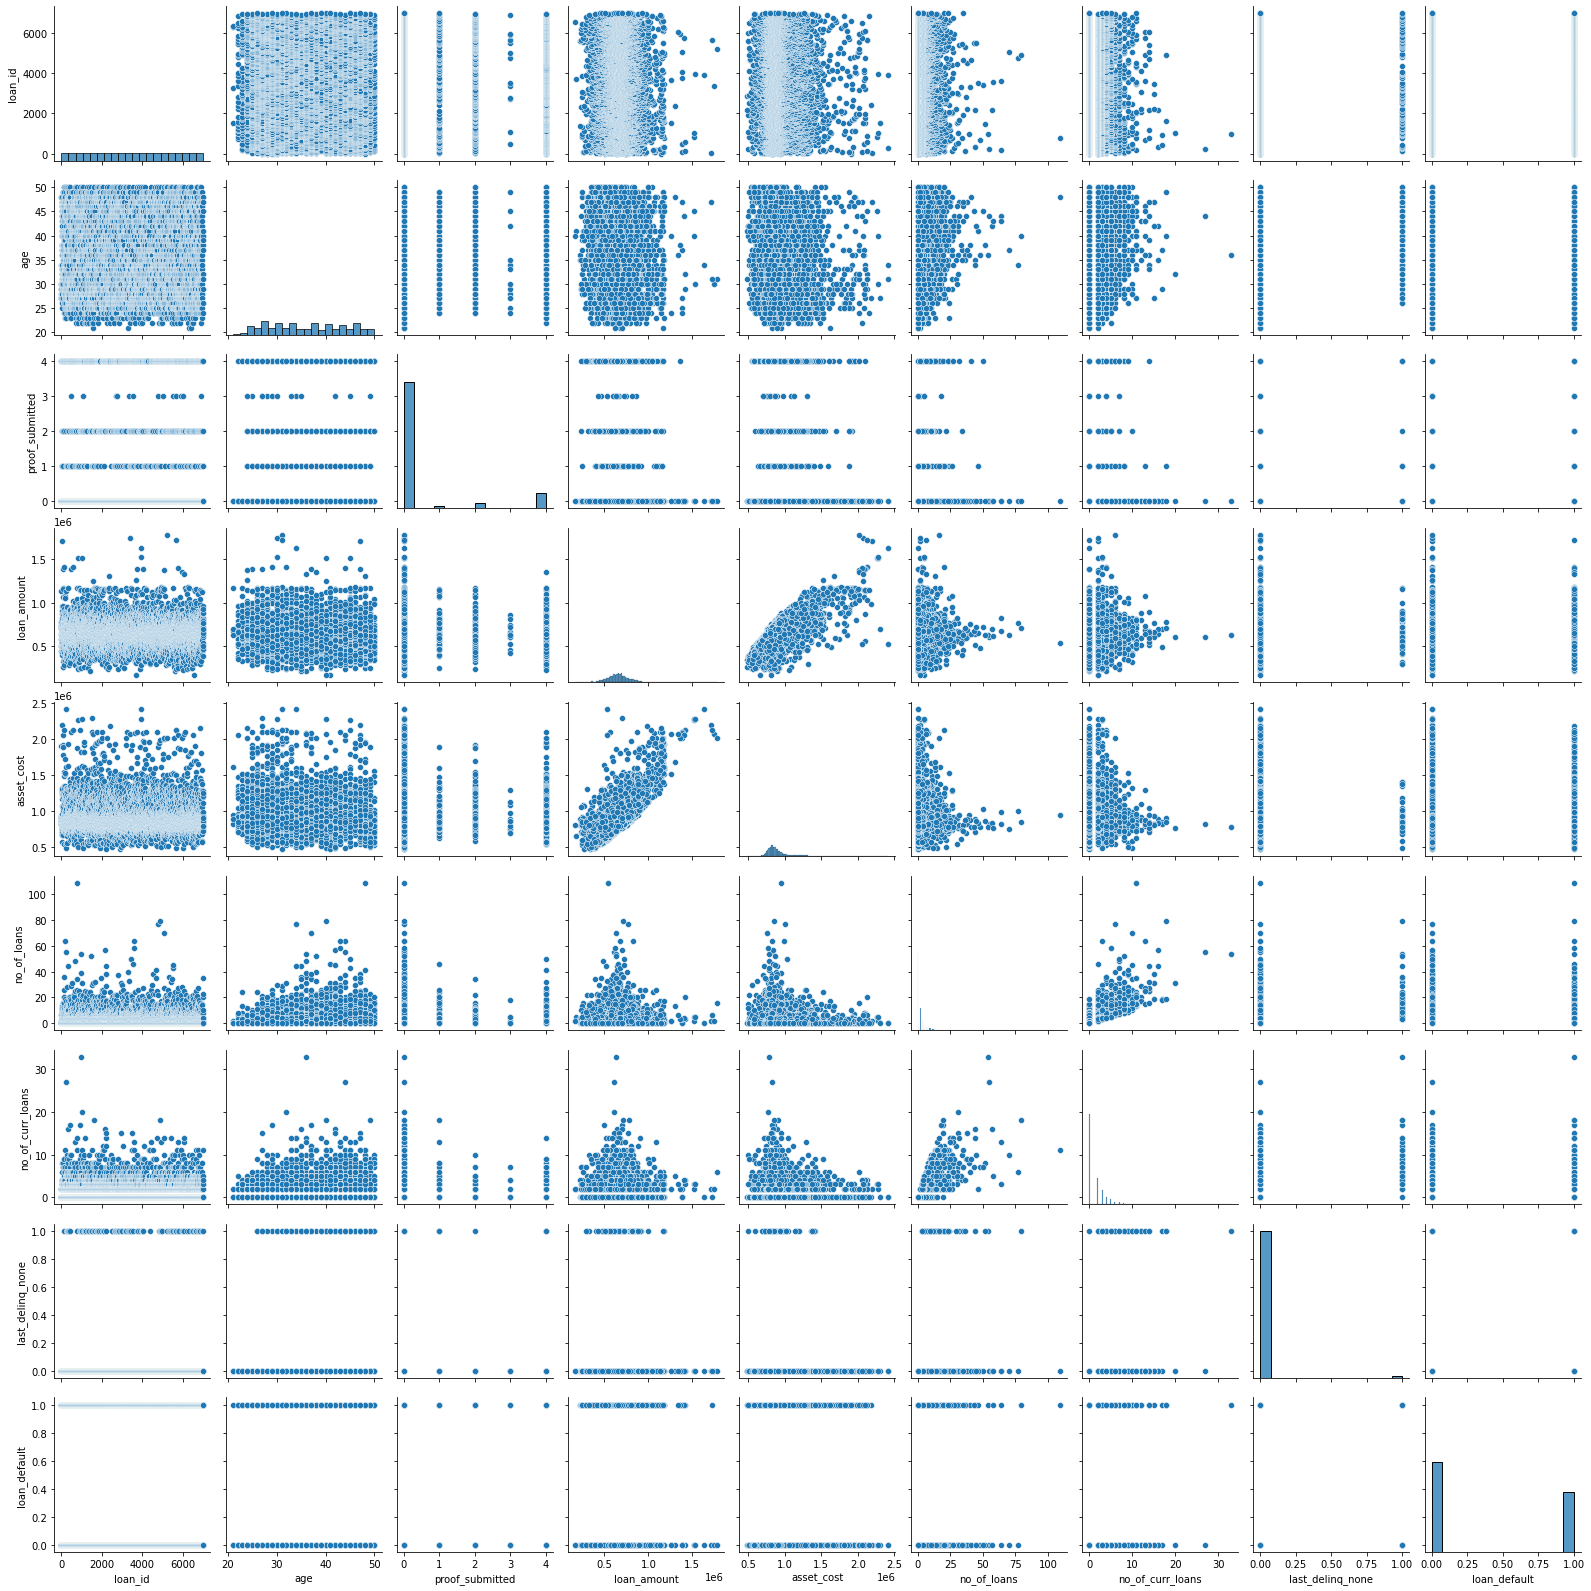

In [86]:
# Plotting Relationship between Variables/Features
sns.pairplot(df_train)

## Splitting Data

In [72]:
# Splitting features and target on data train
X_train = df_train.iloc[:,:-1]
y_train = df_train['loan_default']

In [73]:
# Define data test
X_test = df_test

In [74]:
# Scaling data train and test to get better and robust data of train and test data
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

# Modelling

## AutoML with Dabl

In [75]:
fc = dabl.SimpleClassifier(random_state=0)
fc.fit(X_train_sc, y_train)

Running DummyClassifier()
accuracy: 0.600 average_precision: 0.400 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.375
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.600 average_precision: 0.400 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.375

Running GaussianNB()
accuracy: 0.593 average_precision: 0.460 roc_auc: 0.578 recall_macro: 0.533 f1_macro: 0.513
=== new best GaussianNB() (using recall_macro):
accuracy: 0.593 average_precision: 0.460 roc_auc: 0.578 recall_macro: 0.533 f1_macro: 0.513

Running MultinomialNB()
accuracy: 0.600 average_precision: 0.446 roc_auc: 0.551 recall_macro: 0.500 f1_macro: 0.375
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.529 average_precision: 0.428 roc_auc: 0.553 recall_macro: 0.553 f1_macro: 0.527
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.529 average_precision: 0.428 roc_auc: 0.553 recall_macro: 0.553 f1_macro: 0.527

Running Decision

SimpleClassifier(random_state=0)

In [76]:
# Applying model based on Dabl recommendation: LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=2,class_weight='balanced', max_iter=1000).fit(X_train_sc, y_train)

## Manually search for best result

In [77]:
# Build models
c_svm = svm.SVC()
c_knn = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree')
c_nn = MLPClassifier(hidden_layer_sizes=(5,),activation='logistic',solver='adam',learning_rate='adaptive')
c_dt = DecisionTreeClassifier()

# Fitting models
c_svm = c_svm.fit(X_train_sc, y_train)
c_knn = c_knn.fit(X_train_sc, y_train)
c_nn = c_nn.fit(X_train_sc, y_train)
c_dt = c_dt.fit(X_train_sc, y_train)

# Model Evaluation

In [78]:
# Checking model evaluation based on required metrics: F1 Score
print(f"F1 Score SVM: {f1(y_train, c_svm.predict(X_train_sc), average='macro')}")
print(f"F1 Score KNN: {f1(y_train, c_knn.predict(X_train_sc), average='macro')}")
print(f"F1 Score Neural Network: {f1(y_train, c_nn.predict(X_train_sc), average='macro')}")
print(f"F1 Score Decision Tree: {f1(y_train, c_dt.predict(X_train_sc), average='macro')}")
print(f"F1 Score Logistic Regression:{f1(y_train, clf.predict(X_train_sc), average='macro')}")

F1 Score SVM: 0.4522483253644362
F1 Score KNN: 0.7471988841500439
F1 Score Neural Network: 0.4741953770491438
F1 Score Decision Tree: 1.0
F1 Score Logistic Regression:0.5710090304908797


In [79]:
# Checking model evaluation based on required metrics: F1 Score
print(f"Accuracy Score SVM: {round(acc(y_train, c_svm.predict(X_train_sc))*100,2)}")
print(f"Accuracy Score KNN: {round(acc(y_train, c_knn.predict(X_train_sc))*100,2)}")
print(f"Accuracy Score Neural Network: {round(acc(y_train, c_nn.predict(X_train_sc))*100,2)}")
print(f"Accuracy Score Decision Tree: {round(acc(y_train, c_dt.predict(X_train_sc))*100,2)}")
print(f"Accuracy Score Logistic Regression:{round(acc(y_train, clf.predict(X_train_sc))*100,2)}")

Accuracy Score SVM: 61.79
Accuracy Score KNN: 76.11
Accuracy Score Neural Network: 60.56
Accuracy Score Decision Tree: 100.0
Accuracy Score Logistic Regression:57.36


# Prediction

In [80]:
pred_svm = c_svm.predict(X_test_sc)
pred_knn = c_knn.predict(X_test_sc)
pred_nn = c_nn.predict(X_test_sc)
pred_dt = c_dt.predict(X_test_sc)
clf_pred = clf.predict(X_test_sc)

# Saving Prediction Result to CSV Files

In [81]:
sub_svm = pd.DataFrame({'loan_id':X_test['loan_id'], 'loan_default':pred_svm})
sub_knn = pd.DataFrame({'loan_id':X_test['loan_id'], 'loan_default':pred_knn})
sub_nn = pd.DataFrame({'loan_id':X_test['loan_id'], 'loan_default':pred_nn})
sub_dt = pd.DataFrame({'loan_id':X_test['loan_id'], 'loan_default':pred_dt})
sub_lr = pd.DataFrame({'loan_id':X_test['loan_id'], 'loan_default':clf_pred})

sub_svm.to_csv('/content/drive/MyDrive/3_BELAJAR/ONLINE COURSE/AnalyticsVidhya/Data Hackathon/AnalyticsVidhya - Loan Default Prediction/Submission/sub_svm.csv', index=False)
sub_knn.to_csv('/content/drive/MyDrive/3_BELAJAR/ONLINE COURSE/AnalyticsVidhya/Data Hackathon/AnalyticsVidhya - Loan Default Prediction/Submission/sub_knn.csv', index=False)
sub_nn.to_csv('/content/drive/MyDrive/3_BELAJAR/ONLINE COURSE/AnalyticsVidhya/Data Hackathon/AnalyticsVidhya - Loan Default Prediction/Submission/sub_nn.csv', index=False)
sub_dt.to_csv('/content/drive/MyDrive/3_BELAJAR/ONLINE COURSE/AnalyticsVidhya/Data Hackathon/AnalyticsVidhya - Loan Default Prediction/Submission/sub_dt.csv', index=False)
sub_lr.to_csv('/content/drive/MyDrive/3_BELAJAR/ONLINE COURSE/AnalyticsVidhya/Data Hackathon/AnalyticsVidhya - Loan Default Prediction/sub_lr.csv', index=False)